   # KÜTÜPHANELER

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shap
import warnings

from sklearn import preprocessing, tree
from scipy import stats
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, jaccard_score, log_loss ,confusion_matrix

sns.set_theme(color_codes=True) #seaborn temasını ayarlama

# EDA

In [2]:
df = pd.read_csv('income_evaluation.csv')
df.head() #ilk 5 veriyi döndürür.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.tail() #son 5 veriyi döndürür.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
df.shape #DataFrame'in boyutunu (satır ve sütun sayısı) döndürür.

(32561, 15)

In [5]:
df.info() #DataFrame hakkında genel bilgileri sağlar.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.columns #DataFrame'in sütun (özellik) etiketlerini döndürür.

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [7]:
df.dtypes #DataFrame'in sütunlarının veri tiplerini döndürür.

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [8]:
df.describe() #DataFrame'in istatistiksel özetini sağlar. 

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.isnull().sum() #DataFrame'in her bir sütununda yer alan eksik değerlerin sayısını döndürür. 

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

<AxesSubplot:>

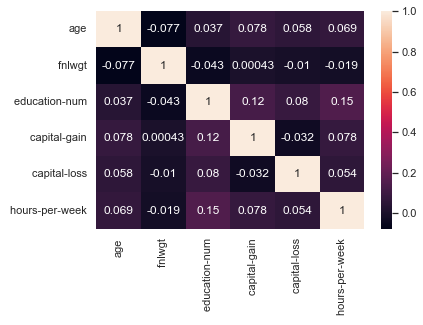

In [10]:
corr=df.corr() #DataFrame'in sütunları arasındaki korelasyon matrisini döndürür. 
sns.heatmap(corr, annot=True ) #Korelasyon matrisinin ısı haritası

# Veri İşleme Part 1

In [11]:
#Veri setindeki sütunların benzersiz değer sayıları
df.select_dtypes(include='object').nunique()

 workclass          9
 education         16
 marital-status     7
 occupation        15
 relationship       6
 race               5
 sex                2
 native-country    42
 income             2
dtype: int64

# Eğitim sütununu daha küçük bir sayıda segmente bölme

In [12]:
df[' education'].unique() #education" (eğitim) sütunundaki benzersiz değerler

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [13]:
# "education" sütunundaki her bir değeri segment_education() fonksiyonuna gönderir ve dönüş değerine göre sütun değerini günceller.
def segment_education(education):
    if education.strip() == 'Bachelors' or education.strip() == 'Masters' or education.strip() == 'Doctorate' or education.strip() == 'Prof-school':
        return 'Higher Education'
    elif education.strip() == 'HS-grad' or education.strip() == 'Some-college':
        return 'High School or Some College'
    elif '9th' in education or '10th' in education or '11th' in education or '12th' in education:
        return 'High School Dropout'
    elif 'Assoc' in education:
        return 'Associate Degree'
    elif '7th-8th' in education or '5th-6th' in education or '1st-4th' in education or 'Preschool' in education:
        return 'School Dropout'
    else:
        return 'Other'

df[' education'] = df[' education'].apply(segment_education)

<AxesSubplot:>

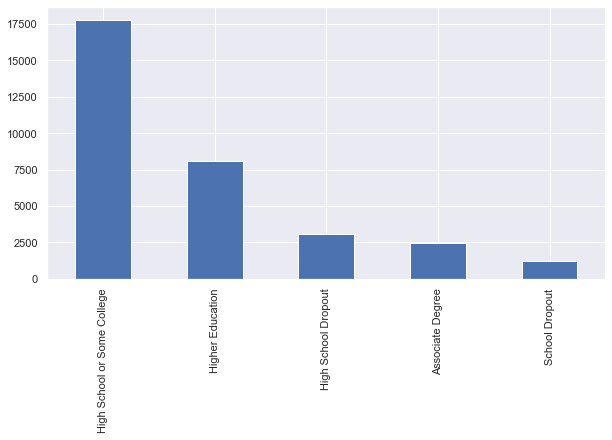

In [14]:
plt.figure(figsize=(10,5))
df[' education'].value_counts().plot(kind='bar')
#"education" sütunundaki kategorilere ait gözlem sayılarını çubuk grafik olarak görselleştirir.

# Occupation sütununu daha küçük segmentlere bölme

In [15]:
df[' occupation'].unique() #"occupation" sütununda yer alan benzersiz değerler

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [16]:
# "occupation" sütunundaki her bir değeri segment_occupation() fonksiyonuna gönderir ve dönüş değerine göre sütun değerini günceller.
def segment_occupation(occupation):
    if occupation.strip() in ['Adm-clerical', 'Exec-managerial']:
        return 'Administrative/Managerial'
    elif occupation.strip() in ['Handlers-cleaners', 'Other-service', 'Priv-house-serv']:
        return 'Service'
    elif occupation.strip() in ['Prof-specialty', 'Tech-support']:
        return 'Professional/Technical'
    elif occupation.strip() in ['Sales']:
        return 'Sales'
    elif occupation.strip() in ['Craft-repair', 'Machine-op-inspct', 'Transport-moving']:
        return 'Skilled Labor'
    elif occupation.strip() in ['Farming-fishing']:
        return 'Farming/Fishing'
    elif occupation.strip() in ['?', 'Armed-Forces']:
        return 'Unknown/Military'
    elif occupation.strip() in ['Protective-serv']:
        return 'Protective Services'
    else:
        return 'Other'
    
df[' occupation'] = df[' occupation'].apply(segment_occupation)

<AxesSubplot:>

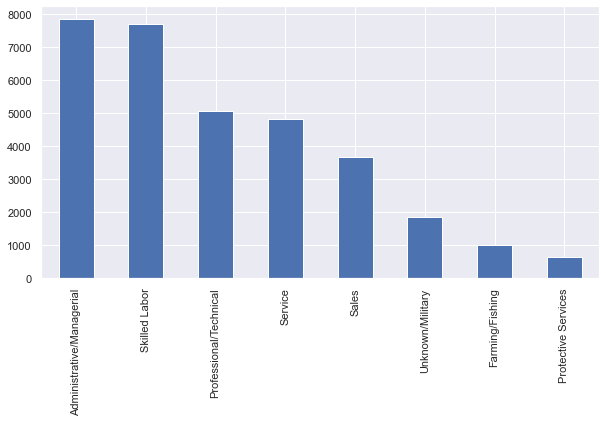

In [17]:
plt.figure(figsize=(10,5))
df[' occupation'].value_counts().plot(kind='bar')
#"occupation" sütunundaki kategorilere ait gözlem sayılarını çubuk grafik olarak görselleştirir.

# Native Country sütununu daha az sayıda kategoriye bölme

In [18]:
df[' native-country'].unique() #"native-country" sütununda yer alan benzersiz değerler

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [19]:
# "native-country" sütunundaki her bir değeri segment_native_country() fonksiyonuna gönderir ve dönüş değerine göre sütun değerini günceller.
def segment_native_country(country):
    if country.strip() in ['United-States', 'Canada']:
        return 'North America'
    elif country.strip() in ['Mexico', 'Cuba', 'Jamaica', 'Dominican-Republic', 'Puerto-Rico', 'Honduras', 'El-Salvador', 'Guatemala', 'Nicaragua', 'Haiti']:
        return 'Central America/Caribbean'
    elif country.strip() in ['Germany', 'England', 'France', 'Italy', 'Poland', 'Scotland', 'Greece', 'Ireland', 'Hungary', 'Holand-Netherlands']:
        return 'Europe'
    elif country.strip() in ['India', 'China', 'Japan', 'Taiwan', 'Iran']:
        return 'Asia'
    elif country.strip() in ['Cambodia', 'Thailand', 'Laos', 'Philippines', 'Vietnam']:
        return 'Southeast Asia'
    elif country.strip() in ['Yugoslavia', 'Greece']:
        return 'Balkans'
    elif country.strip() in ['Outlying-US(Guam-USVI-etc)']:
        return 'US Territories'
    else:
        return 'Other'

df[' native-country'] = df[' native-country'].apply(segment_native_country)

<AxesSubplot:>

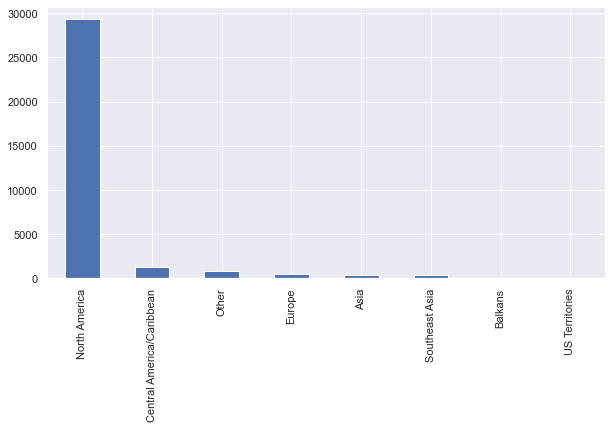

In [20]:
#"native-country" sütunundaki kategorilere ait gözlem sayılarını çubuk grafik olarak görselleştirir.
plt.figure(figsize=(10,5))
df[' native-country'].value_counts().plot(kind='bar')

In [21]:
#Veri setinizdeki tüm nesne veri türüne sahip sütunlardaki benzersiz değer sayısı
df.select_dtypes(include='object').nunique()

 workclass         9
 education         5
 marital-status    7
 occupation        8
 relationship      6
 race              5
 sex               2
 native-country    8
 income            2
dtype: int64

In [22]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Higher Education,13,Never-married,Administrative/Managerial,Not-in-family,White,Male,2174,0,40,North America,<=50K
1,50,Self-emp-not-inc,83311,Higher Education,13,Married-civ-spouse,Administrative/Managerial,Husband,White,Male,0,0,13,North America,<=50K
2,38,Private,215646,High School or Some College,9,Divorced,Service,Not-in-family,White,Male,0,0,40,North America,<=50K
3,53,Private,234721,High School Dropout,7,Married-civ-spouse,Service,Husband,Black,Male,0,0,40,North America,<=50K
4,28,Private,338409,Higher Education,13,Married-civ-spouse,Professional/Technical,Wife,Black,Female,0,0,40,Central America/Caribbean,<=50K


# KEŞİFSEL VERİ ANALİZİ

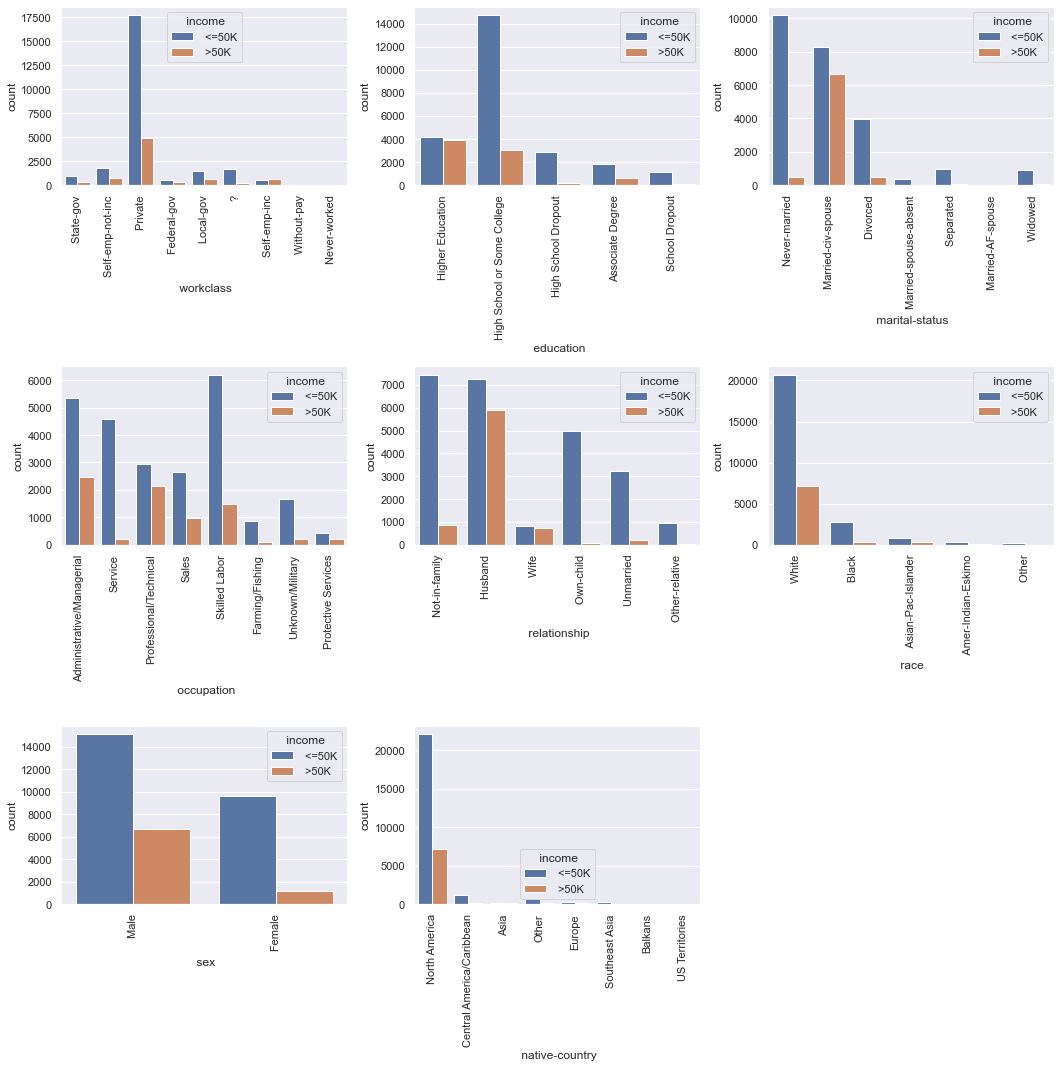

In [23]:
# Liste içerisindeki kategorik değişkenler
cat_vars = [' workclass', ' education', ' marital-status', ' occupation', ' relationship',
            ' race', ' sex', ' native-country']

# Alt grafiklerle birlikte bir şekil oluşturma
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# Her bir kategorik değişken için çubuk grafik oluşturma
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue=' income', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Alt grafikler arasındaki boşluğu ayarlama
fig.tight_layout()

# Dokuzuncu alt grafiği kaldırma
fig.delaxes(axs[8])

# Grafikleri görüntüleme
plt.show()

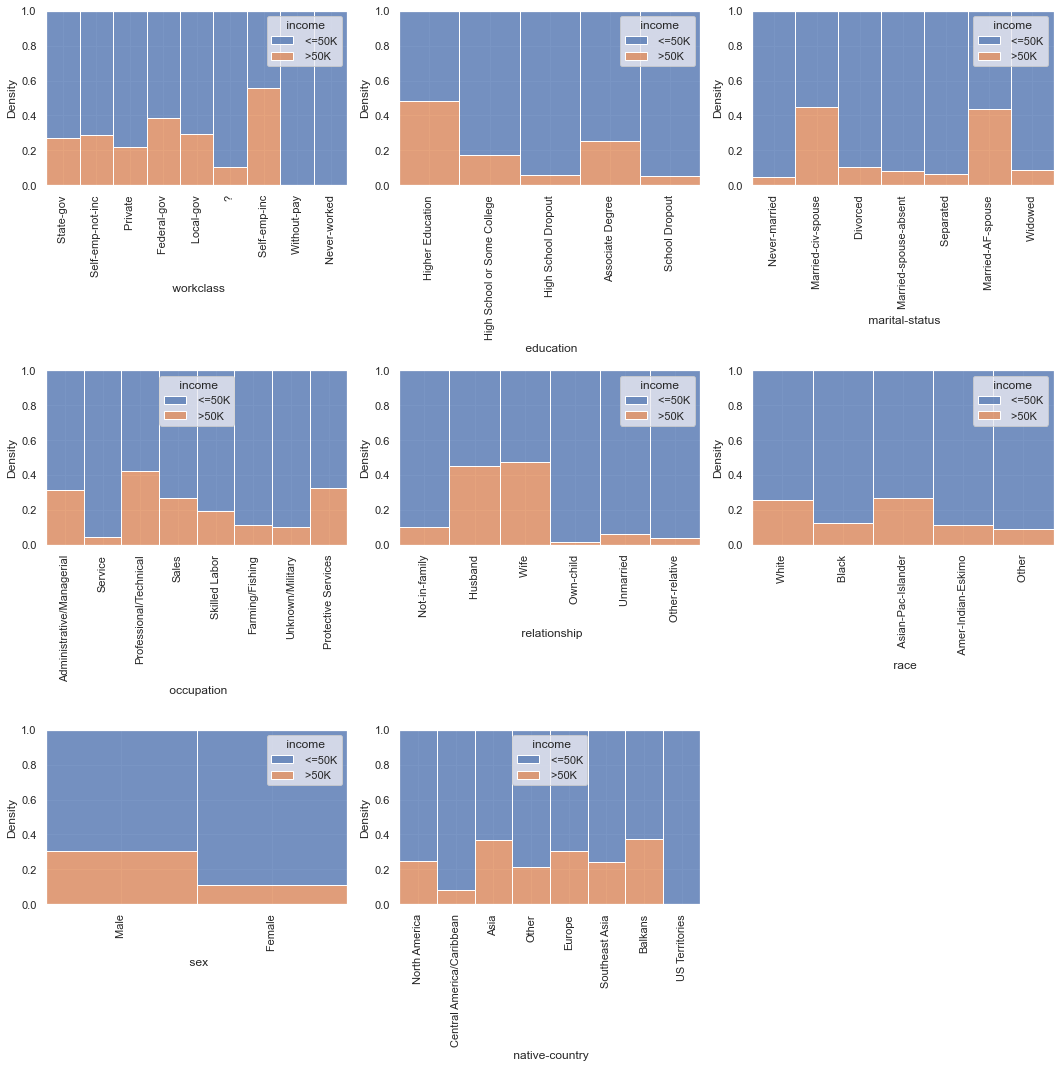

In [24]:
warnings.filterwarnings("ignore")
# Kategorik değişkenlerin listesi
cat_vars = [' workclass', ' education', ' marital-status', ' occupation', ' relationship',
            ' race', ' sex', ' native-country']

# Alt grafiklerle birlikte bir şekil oluşturma
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# Her bir kategorik değişken için histogram grafik oluşturma
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue=' income', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# Alt grafikler arasındaki boşluğu ayarlama
fig.tight_layout()

# Dokuzuncu alt grafiği kaldırma
fig.delaxes(axs[8])

# Grafikleri görüntüleme
plt.show()

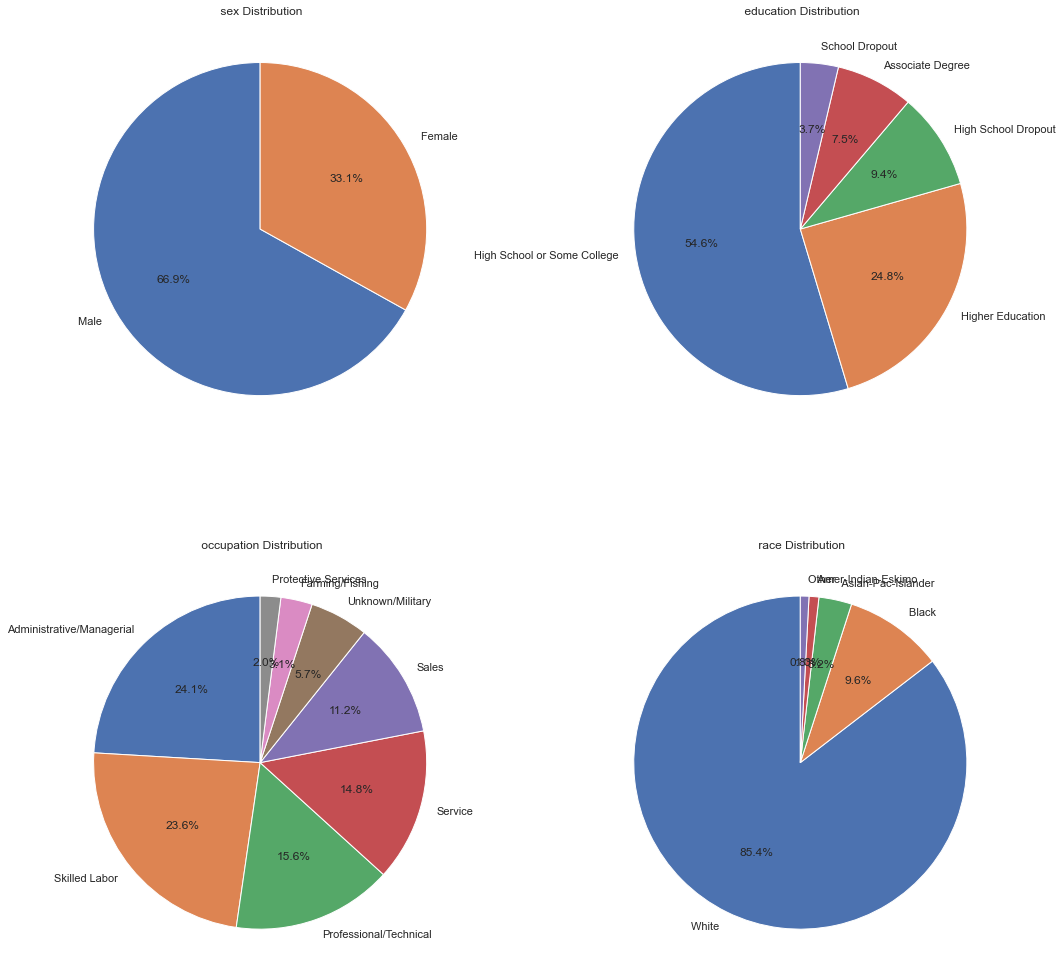

In [25]:
cat_vars = [' sex', ' education', ' occupation', ' race']

# Şekil ve eksenler oluşturma
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Her bir kategorik değişken için pasta grafikleri oluşturma
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Her bir kategori için gözlem sayısını hesaplama
        cat_counts = df[var].value_counts()

        # Pasta grafikleri oluşturma
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

         # Her bir alt grafiğe başlık belirleme
        axs.flat[i].set_title(f'{var} Distribution')

# Alt grafikler arasındaki boşluğu ayarlama
fig.tight_layout()

# Grafikleri görüntüleme
plt.show()

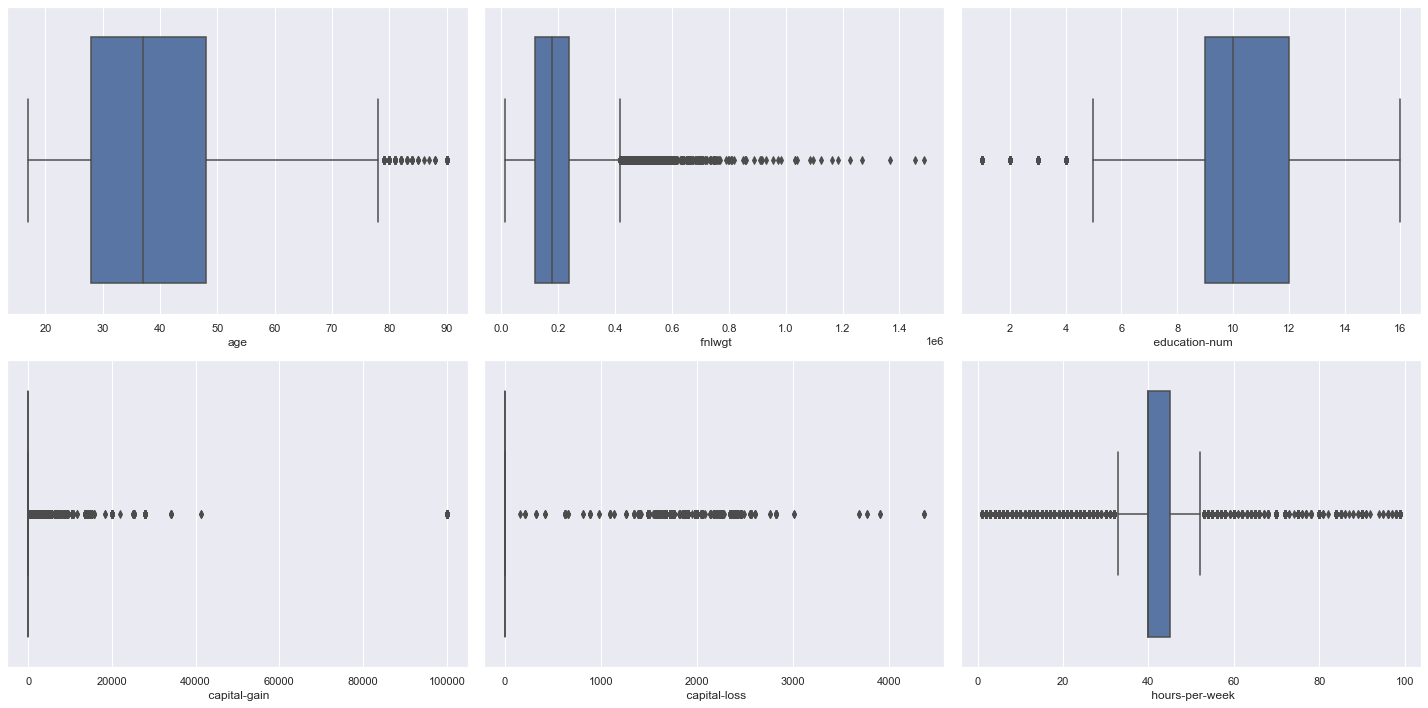

In [26]:
# Sayısal değişkenlerin listesi
num_vars = ['age', ' fnlwgt', ' education-num', ' capital-gain',
            ' capital-loss', ' hours-per-week']

# Şekil ve eksenler oluşturma
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

# Her bir sayısal değişken için kutu grafiği oluşturma
for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

# Alt grafikler arasındaki boşluğu ayarlama
fig.tight_layout()

# Grafikleri görüntüleme
plt.show()

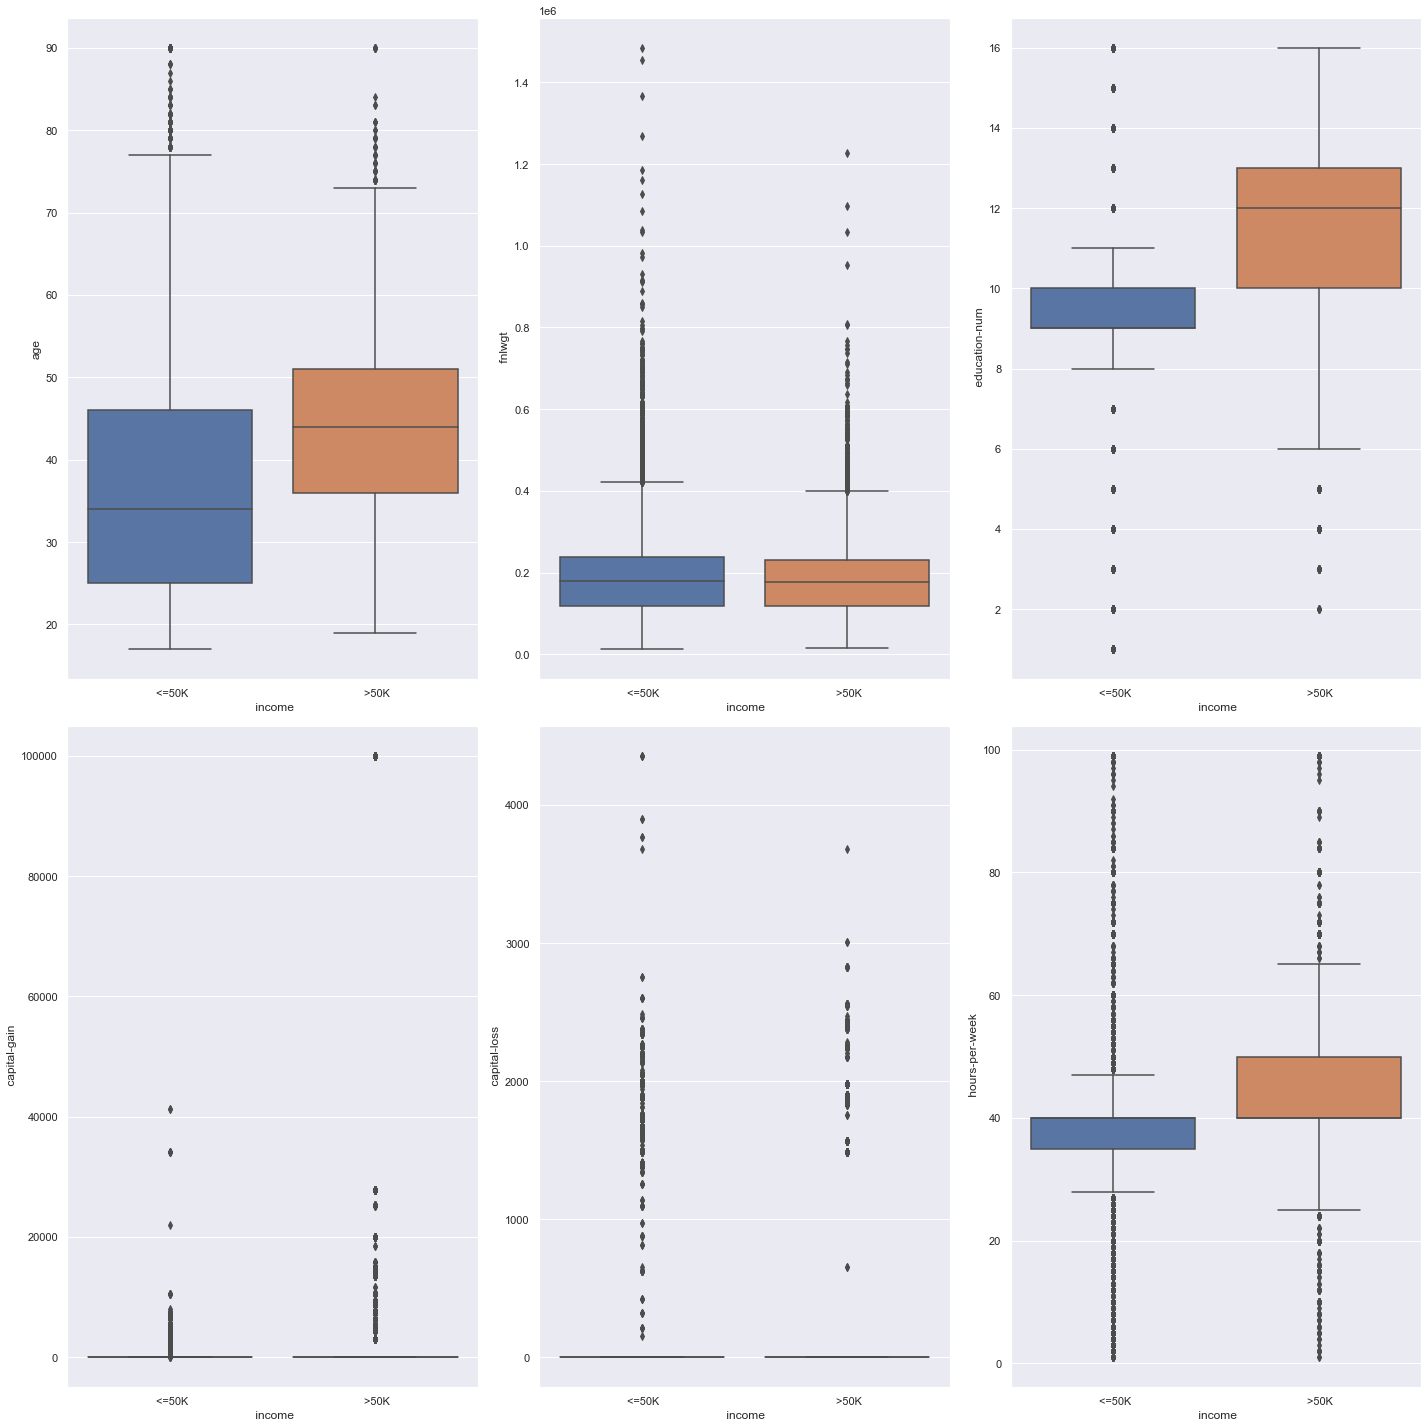

In [27]:
# Sayısal değişkenlerin listesi
num_vars = ['age', ' fnlwgt', ' education-num', ' capital-gain',
            ' capital-loss', ' hours-per-week']

# Şekil ve eksenler oluşturma
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()

# Her bir sayısal değişken için kutu grafiği oluşturma
for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x=' income', data=df, ax=axs[i])

# Alt grafikler arasındaki boşluğu ayarlama
fig.tight_layout()

# Grafikleri görüntüleme
plt.show()

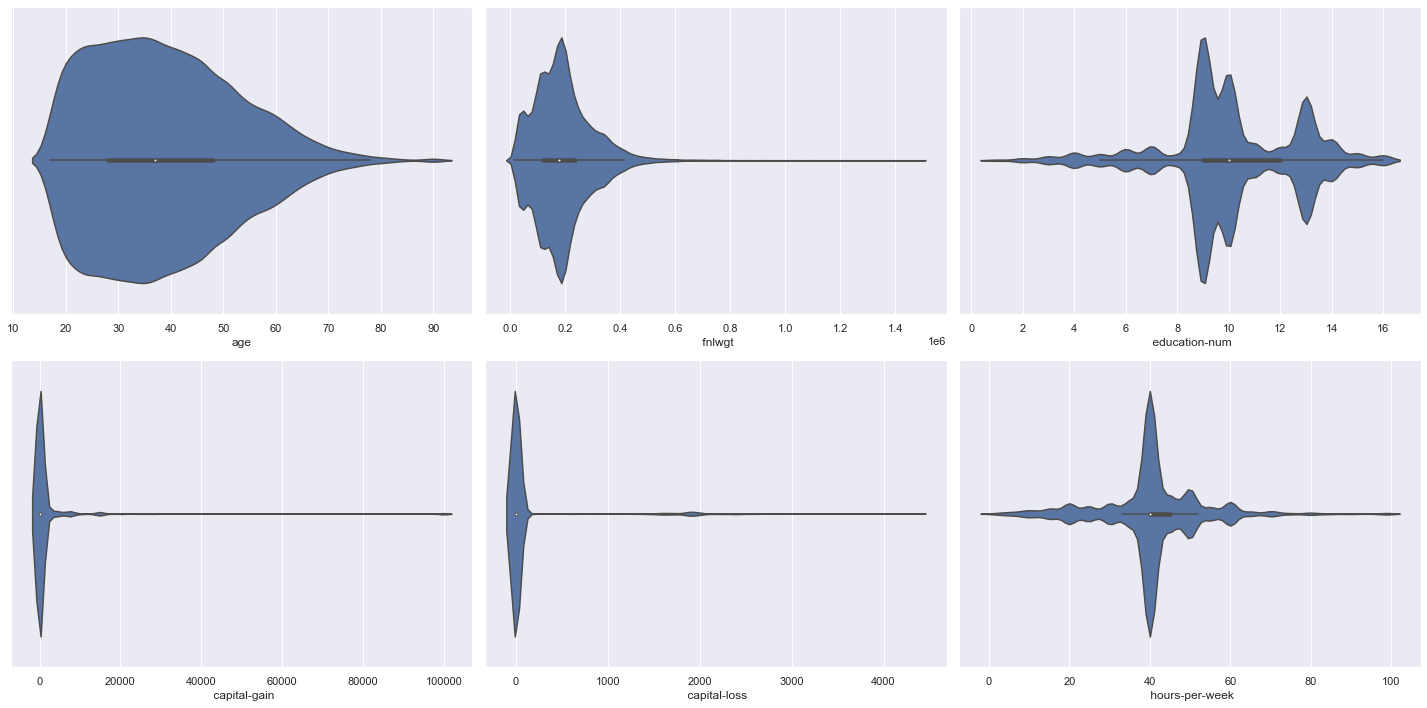

In [28]:
# Sayısal değişkenlerin listesi
num_vars = ['age', ' fnlwgt', ' education-num', ' capital-gain',
            ' capital-loss', ' hours-per-week']

# Şekil ve eksenler oluşturma
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

# Her bir sayısal değişken için violin grafiği oluşturma
for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

# Alt grafikler arasındaki boşluğu ayarlama
fig.tight_layout()

# Grafikleri görüntüleme
plt.show()

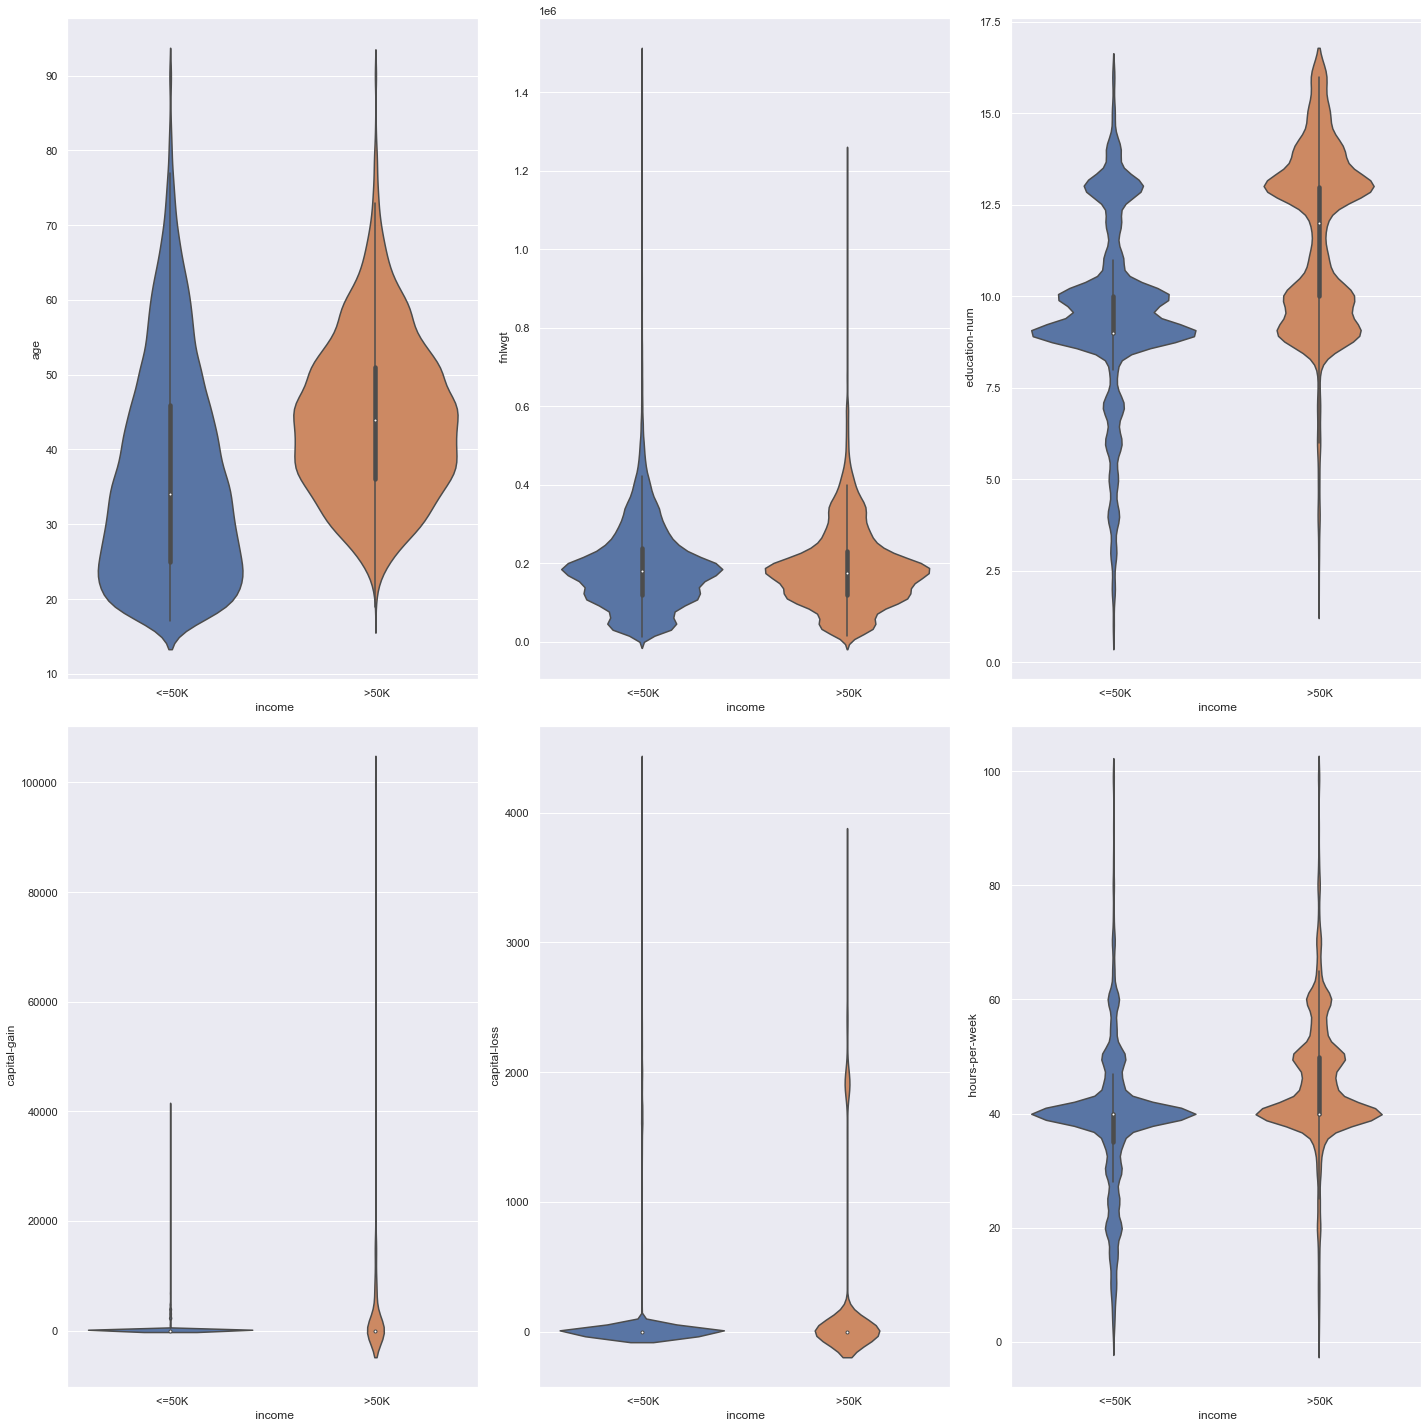

In [29]:
# Sayısal değişkenlerin listesi
num_vars = ['age', ' fnlwgt', ' education-num', ' capital-gain',
            ' capital-loss', ' hours-per-week']

# Şekil ve eksenler oluşturma
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()

# Her bir sayısal değişken için violin grafiği oluşturma
for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=df, x=' income', ax=axs[i])

# Alt grafikler arasındaki boşluğu ayarlama
fig.tight_layout()

# Grafikleri görüntüleme
plt.show()

# Veri İşleme Part 2

In [30]:
#Eksik değerleri kontrol etme
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# Nesne veri tipleri için etiket kodlaması

In [31]:
# DataFrame'deki her bir sütun için döngü oluşturun, veri tipi 'object' olan sütunları seçin
for col in df.select_dtypes(include=['object']).columns:
    
    # Sütun adını ve benzersiz değerleri yazdırın
    print(f"{col}: {df[col].unique()}")

 workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 education: ['Higher Education' 'High School or Some College' 'High School Dropout'
 'Associate Degree' 'School Dropout']
 marital-status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 occupation: ['Administrative/Managerial' 'Service' 'Professional/Technical' 'Sales'
 'Skilled Labor' 'Farming/Fishing' 'Unknown/Military'
 'Protective Services']
 relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
 race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
 sex: [' Male' ' Female']
 native-country: ['North America' 'Central America/Caribbean' 'Asia' 'Other' 'Europe'
 'Southeast Asia' 'Balkans' 'US Territories']
 income: [' <=50K' ' >50K']


In [32]:
# DataFrame'deki her bir sütun için döngü oluşturun, veri tipi 'object' olan sütunları seçin
for col in df.select_dtypes(include=['object']).columns:
    
    # Bir LabelEncoder nesnesi başlatın
    label_encoder = preprocessing.LabelEncoder()
    
     # Kodlayıcıyı sütundaki benzersiz değerlere uydurun
    label_encoder.fit(df[col].unique())
    
    # Sütunu kodlayıcı kullanarak dönüştürün
    df[col] = label_encoder.transform(df[col])
    
    # Sütun adını ve benzersiz kodlanmış değerleri yazdırın
    print(f"{col}: {df[col].unique()}")

 workclass: [7 6 4 1 2 0 5 8 3]
 education: [3 2 1 0 4]
 marital-status: [4 2 0 3 5 1 6]
 occupation: [0 5 2 4 6 1 7 3]
 relationship: [1 0 5 3 4 2]
 race: [4 2 1 0 3]
 sex: [1 0]
 native-country: [4 2 0 5 3 6 1 7]
 income: [0 1]


# Korelasyon Isı Haritası

<AxesSubplot:>

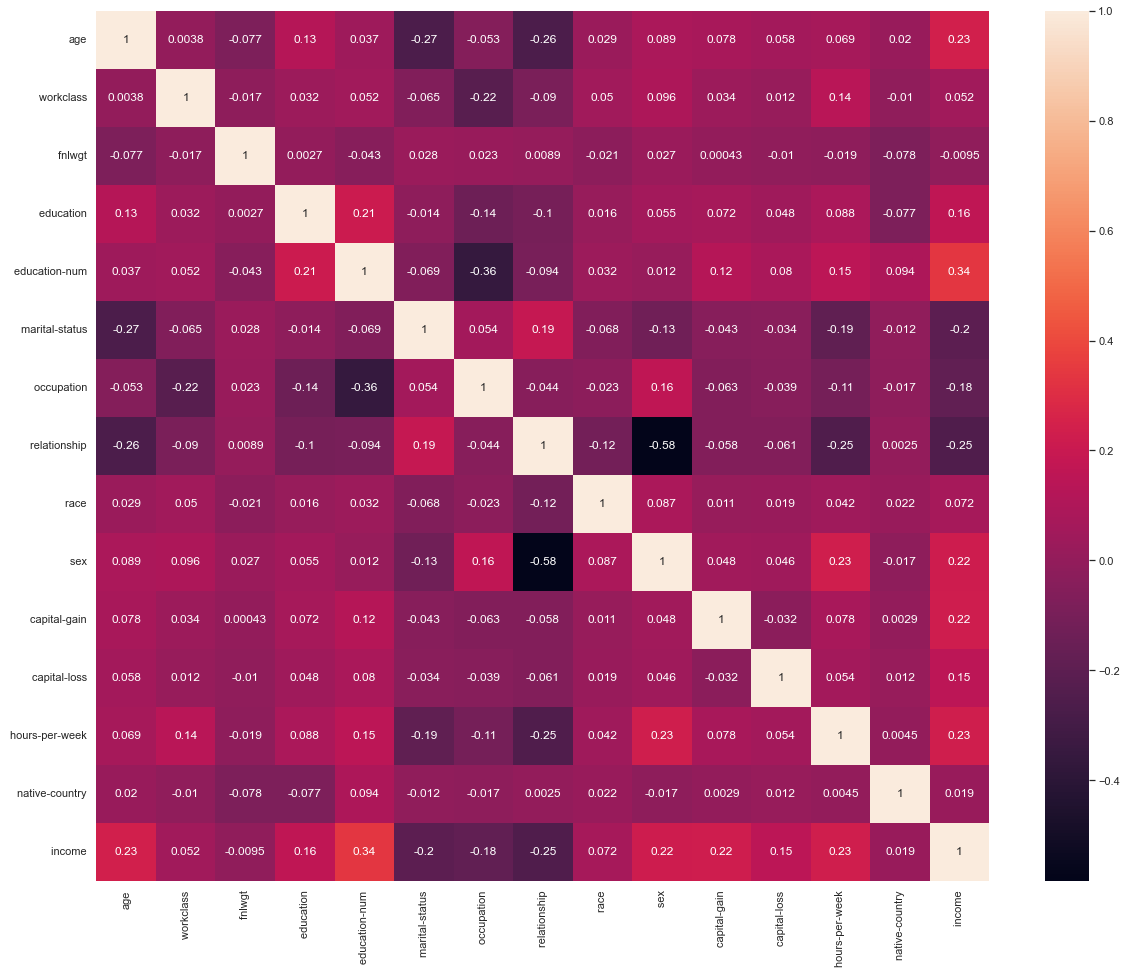

In [33]:
#Korelasyon ısı haritası
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split

In [34]:
# Özellikleri (X) ve hedef değişkeni (y) seçin
X = df.drop(' income', axis=1)
y = df[' income']

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (26048, 14)
X_test (6513, 14)
y_train (26048,)
y_test (6513,)


In [36]:
# min-max normalization: eğitim ve test veilerini normalize etmek, verilerin aynı ölçekte olmasını sağlar
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max-x_train_min)
X_test = (X_test - x_train_min)/(x_train_max-x_train_min)

# Z-Skorunu kullanarak Eğitim Verilerinde Aykırı Değerleri Kaldırma

In [37]:
# Aykırı değerleri kaldırmak istediğiniz sütunları belirleyin
selected_columns = [' fnlwgt', ' capital-gain', ' capital-loss', ' hours-per-week']

# Eğitim verilerinde seçilen sütunlar için Z-skorlarını hesaplayın
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Aykırı değer tespiti için bir eşik değeri belirleyin (ör. 3)
threshold = 3

# Eşik değere göre aykırı değerlerin indekslerini bulun
outlier_indices = np.where(z_scores > threshold)[0]

# Eğitim verilerinden aykırı değerleri kaldırın
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Decision Tree

In [38]:
# Dengeli sınıf ağırlığı kullanarak bir DecisionTreeClassifier örneği oluştur
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# GridSearchCV kullanarak çapraz doğrulama ile en iyi hiperparametreleri bul
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# En iyi hiperparametreleri yazdır
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [39]:
#Karar ağacı oluşturulur
dtree = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=2, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=2,
                       random_state=42)

In [40]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")#Doğruluk Skoru

Accuracy Score : 79.13 %


In [41]:
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.7913403961308154
Precision Score :  0.7913403961308153
Recall Score :  0.7913403961308153
Jaccard Score :  0.6547256097560976
Log Loss :  7.206989936020279


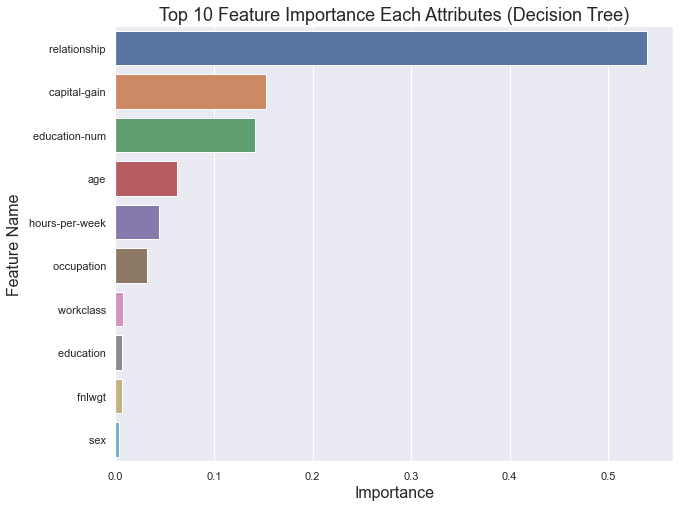

In [42]:
# Özellik önem sıralaması için bir DataFrame oluştur
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
# Öneme göre sıralı bir şekilde DataFrame'i yeniden düzenle
fi = imp_df.sort_values(by="Importance", ascending=False)

# En önemli 10 özelliği seç
fi2 = fi.head(10)
# Görselleştirme için bir figura oluştur
plt.figure(figsize=(10,8))
# Çubuk grafik kullanarak özellik önemlerini göster
sns.barplot(data=fi2, x='Importance', y='Feature Name')
# Başlık ve eksen etiketlerini belirle
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

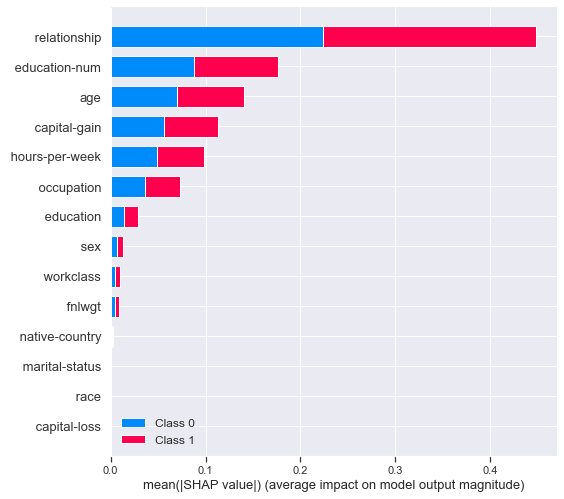

In [43]:
#SHAP (SHapley Additive exPlanations), makine öğrenimi modellerinin özelliklerini açıklamak için kullanılan bir açıklanabilirlik yöntemidir. 
# shap değerlerini hesaplamak için bir TreeExplainer oluştur
explainer = shap.TreeExplainer(dtree)
# shap değerlerini hesapla
shap_values = explainer.shap_values(X_test)
# shap değerlerini özetle ve görselleştir
shap.summary_plot(shap_values, X_test)
#Bu görselleştirme, her özelliğin shap değerlerinin toplam etkisini gösterir.

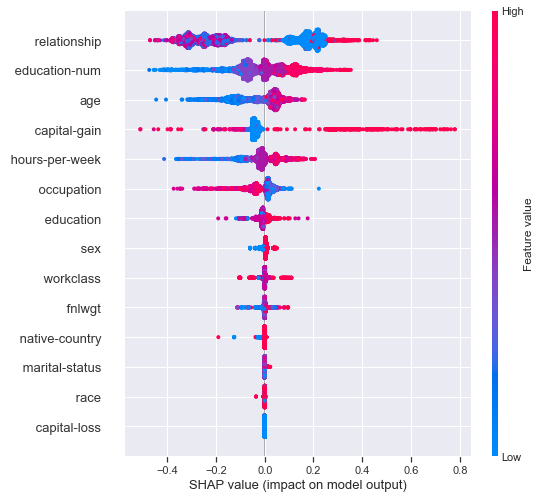

In [44]:
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
# shap_values[1] sınıf 1 (geliri yüksek) için hesaplanan SHAP değerlerini temsil eder
# X_test.values, özelliklerin değerlerini içeren numpy dizisini temsil eder
# feature_names, özellik isimlerini içeren bir liste olarak X_test.columns kullanılır
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.7913403961308153')

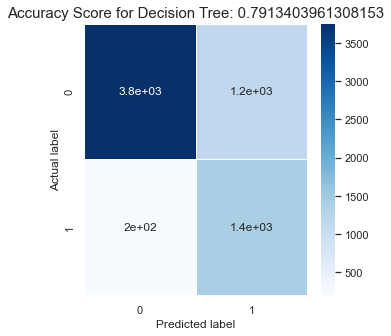

In [45]:
#Tahmin sonuçlarının gerçek etiketlerle karşılaştırıldığı bir confusion matrix oluşturur. 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label') #Gerçek
plt.xlabel('Predicted label') #Tahmin
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

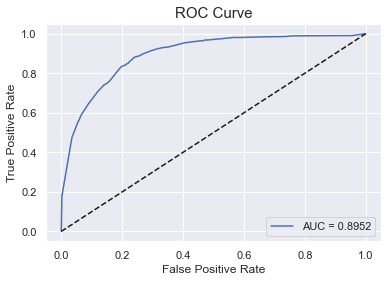

In [46]:
# Tahmin olasılıkları elde ediliyor
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]
# Gerçek ve tahmin edilen değerler içeren bir DataFrame oluşturuluyor
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
# ROC eğrisi için gerekli değerler hesaplanıyor
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
# ROC eğrisi çizdiriliyor
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# XGBoost

In [47]:
# XGBoost sınıflandırıcısı oluşturuluyor
xgb = XGBClassifier()

# Grid search için parametre grid'i tanımlanıyor
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.2]
}

# Grid search ile çapraz doğrulama yapılarak en iyi hiperparametreler bulunuyor
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# En iyi hiperparametreler yazdırılıyor
print(grid_search.best_params_)

{'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [48]:
# XGBoost sınıflandırıcısı oluşturuluyor ve belirlenen en iyi hiperparametrelerle başlatılıyor
xgb = XGBClassifier(gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200)
# X_train ve y_train verileri üzerinde model eğitimi yapılıyor
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [49]:
y_pred = xgb.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 85.12 %


In [50]:
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8512206356517734
Precision Score :  0.8512206356517734
Recall Score :  0.8512206356517734
Jaccard Score :  0.7409783480352847
Log Loss :  5.138697097471713


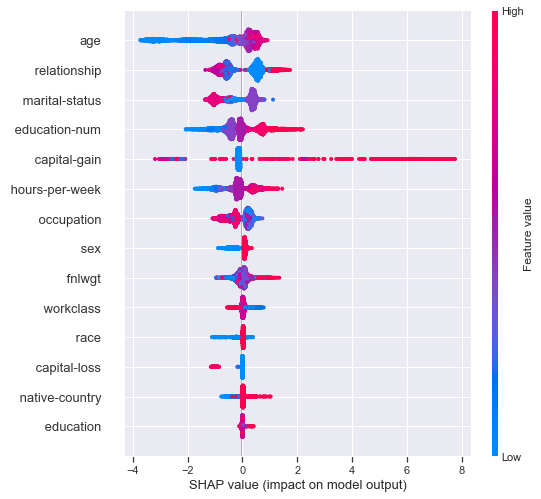

In [51]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Text(0.5, 1.0, 'Accuracy Score for XGBoost: 0.8512206356517734')

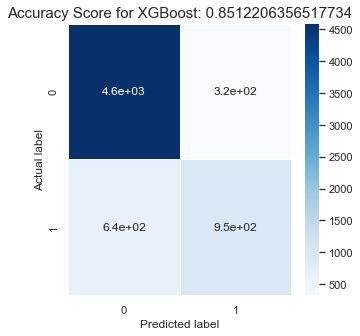

In [52]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label') #Gerçek
plt.xlabel('Predicted label') #Tahmin
all_sample_title = 'Accuracy Score for XGBoost: {0}'.format(xgb.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

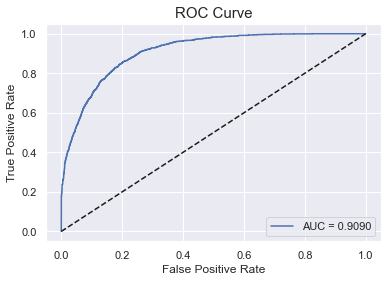

In [53]:
y_pred_proba = xgb.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()